In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# reading in beer_reviews_data and storing it under variable df
df = pd.read_csv('data/beer_reviews_data.csv')

# displaying a random sample of the dataset utilizing the .sample() function
df.sample(n = 10, random_state = 42)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
116087,5.8,234,76,Hacker-Pschorr Oktoberfest-M�rzen,M�rzen / Oktoberfest,4.0,3.5,4.0,4.5,divineaudio,4.5,pint glass. a - pours a clear amber liquid wit...,1317698982
218685,8.7,1446,158,Hibernation Ale,Old Ale,4.5,4.5,4.0,3.5,Cylinsier,3.0,From a 12 oz. Pours a maple syrup brown that g...,1262818901
63854,11.0,74491,16866,4 Calling Birds,Belgian Strong Dark Ale,4.0,3.0,3.0,3.5,womencantsail,3.0,On-tap at the Bruery Almost black with a dense...,1321823635
234370,5.0,43341,1628,Southampton Altbier,Altbier,2.5,4.0,4.0,3.5,DerekP,3.5,"According to the label, a ""Dusseldorf-Style Br...",1280711924
501494,9.0,40187,132,XS Imperial Red,American Amber / Red Ale,4.0,4.0,3.0,3.0,Gueuzedude,3.5,"Sampled on Tap at 1702, Tucson AZ; August 2008...",1219009004
246729,9.0,2512,215,Chimay Grande R�serve (Blue),Belgian Strong Dark Ale,3.5,5.0,4.5,4.0,mentor,4.0,Three finger dead tan head over a cloudy dark ...,1195591313
489422,5.3,353,132,Mocha Porter,American Porter,4.5,4.0,4.0,4.0,Stubbie1,4.0,"Appearance: Poured black, finished with a nice...",1041482821
243405,11.0,7975,48,Bi�re Du Boucanier Golden,Belgian Strong Pale Ale,3.5,4.5,3.0,3.0,Infamous7100,3.5,"Consumed this from a snifter, as you should wi...",1239405638
4124,8.4,52211,14879,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,3.5,3.0,3.5,Huhzubendah,3.5,Bottle shared by Chaney. Thanks Brandon! A: Th...,1286322675
479954,5.9,17300,9529,Pale Ale,American Pale Ale (APA),4.5,4.0,3.5,4.0,belgaridub,4.5,This came to the table a dark red-brown color....,1147897647


In [2]:
# understanding the data landscape of the dataset (dtype, non-null values and memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [3]:
# looking at descriptive statistics for all numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
beer_ABV,508590.0,7.017442e+00,2.204460e+00,1.000000e-02,5.300000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerId,528870.0,2.209847e+04,2.215828e+04,3.000000e+00,1.745000e+03,1.436800e+04,4.052800e+04,7.731000e+04
beer_brewerId,528870.0,2.598423e+03,5.281805e+03,1.000000e+00,1.320000e+02,3.940000e+02,1.475000e+03,2.798000e+04
review_appearance,528870.0,3.864522e+00,6.040104e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palette,528870.0,3.758926e+00,6.853349e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_overall,528870.0,3.833197e+00,7.099618e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_taste,528870.0,3.765993e+00,6.690176e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_aroma,528870.0,3.817350e+00,7.189030e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_time,528870.0,1.224885e+09,7.605600e+07,8.843904e+08,1.174613e+09,1.240366e+09,1.288560e+09,1.326277e+09


In [4]:
# checking for null values
df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [5]:
# lastly understanding the dimensionality of the dataset
df.shape

(528870, 13)

### Dimensionality Results

+ This dataset contains 528,870 beer reviews
+ it has 13 columns 

### Another question

+ How many unique users make up the 528,870 reviews?
+ We can use the .nunique() to understand the unique number of customers making up the dataset
+ What is the percentage of reviews per unique customer?
+ Let's answer this in the cell below

In [15]:
# converting review_time column to datetime format
# unit = s indicates that the timestamps are in seconds
df['review_time'] = pd.to_datetime(df['review_time'], unit = 's').dt.date

ValueError: unit='s' not valid with non-numerical val='2009-02-16'

In [16]:
df

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",2009-03-01
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",2009-03-01
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",2009-02-15
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",2010-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",2008-03-11
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,2008-02-20
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,2008-01-26
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",2008-01-24


In [7]:
# using the .nunique() function on the review_profileName column to understand the unique number of users making up the dataset
# storing it under users
users = df['review_profileName'].nunique()

# storing the total number of reviews in a variable for easier readability
total_reviews = len(df)

# calculating the numbers of reviews per customer
reviews_per_customer = round(total_reviews / users, 2)

# printing short statement with the answer
print(f"The average reviews per customer is {reviews_per_customer}. There are some very dedicated beer consumers!")

The average reviews per customer is 23.2. There are some very dedicated beer consumers!


### Out of my own curiosity..

+ Let's take a look at the top customers and the total number of reviews
+ Curious to see if there are many over 100, 500???? and if so, how many?
+ How many days from the earliest to the latest review for each customer?


### After those discoveries

+ Is the dataset somewhat balanced or is there a small handful of customers leaving a lot of reviews?

In [8]:
# grouping a dataframe by the user id and counting the total times they reviewed a beer
unique_user_ids = df.groupby('review_profileName')['beer_beerId'].count().reset_index().rename({"beer_beerId" : "total_reviews"}, axis = 1).sort_values(by = 'total_reviews', ascending = False)

# displaying the dataframe
unique_user_ids

,review_profileName,total_reviews
18434,northyorksammy,1858
17597,mikesgroove,1403
1672,BuckeyeNation,1298
22470,womencantsail,1238
6685,Phyl21ca,1164
...,...,...
16887,lucasj82,1
9754,aphineday,1
9755,aphor,1
16884,ltwhiskers,1


In [27]:
# grouping the dataframe by unique user ids and calling on the earlist and latest review date by user id
user_review_dates = df.groupby('review_profileName')['review_time'].agg(['min', 'max']).reset_index()

# calculating the difference in days from the earliest review date to the latest
user_review_dates['total_days_reviewing'] = user_review_dates['max'] - user_review_dates['min']

# changing the datatype on the total days leaving reviews from timedelta to days
user_review_dates['total_days_reviewing'] = user_review_dates['total_days_reviewing'].dt.days

# displaying the dataframe to ensure it worked
user_review_dates

,review_profileName,min,max,total_days_reviewing
0,0110x011,2008-03-18,2009-08-25,525
1,03SVTCobra,2007-11-26,2007-11-29,3
2,04101Brewer,2011-01-26,2011-01-26,0
3,05Harley,2009-09-15,2011-11-27,803
4,0runkp0s,2010-12-29,2010-12-29,0
...,...,...,...,...
22795,zymrgy,2008-08-16,2009-02-22,190
22796,zymurgy4all,2005-12-31,2009-04-23,1209
22797,zymurgywhiz,2009-01-08,2009-01-08,0
22798,zythus,2009-03-21,2009-05-31,71


In [28]:
# merging both user_ids dataset and the user_review_dates for a centralized dataset with all of the information
user_df = pd.merge(unique_user_ids, user_review_dates, how = 'left', on = 'review_profileName')

user_df

,review_profileName,total_reviews,min,max,total_days_reviewing
0,northyorksammy,1858,2003-11-30,2012-01-09,2962
1,mikesgroove,1403,2006-11-06,2011-12-15,1865
2,BuckeyeNation,1298,2003-12-03,2011-05-05,2710
3,womencantsail,1238,2009-06-22,2012-01-09,931
4,Phyl21ca,1164,2003-07-14,2012-01-10,3102
...,...,...,...,...,...
22795,lucasj82,1,2011-02-05,2011-02-05,0
22796,aphineday,1,2011-01-05,2011-01-05,0
22797,aphor,1,2009-05-03,2009-05-03,0
22798,ltwhiskers,1,2008-10-07,2008-10-07,0


### Question 1: Which breweries produce the strongest beer?

#### Approach

+ In order to measure the strongest beers, we need to calculate the average ABV (Alcohol by Volume)
+ Therefore, group by the brewer ID, calculate the mean beer ABV and sort it in descending order
+ Using the .rank() function, then we can filter out for the topm 3 strongest Breweries

In [9]:
# grouping the dataset by brewer_abv and calculating the average alcohol by volume
df_abv = df.groupby('beer_brewerId')['beer_ABV'].mean().reset_index().sort_values(by = 'beer_ABV', ascending = False)

# rounding the average to the second decimal point and filling any null values with 0 for cleaner data
df_abv['beer_ABV'] = round(df_abv['beer_ABV'], 2).fillna(0)

# renaming the column for better readability
df_abv = df_abv.rename({"beer_ABV" : "avg_ABV"}, axis = 1)

# using the rank function to determine the top 3 breweries with the strongest beer
df_abv['rank'] = df_abv['avg_ABV'].rank(method = 'dense', ascending = False)

# displaying the dataset and filtering out for the top 3
df_abv[df_abv['rank'] <= 3]

,beer_brewerId,avg_ABV,rank
784,6513,19.23,1.0
175,736,13.75,2.0
1644,24215,12.47,3.0


### Telling a Story with the data

+ Let's look at the distribution of Alcohol by Volume using visuals
+ Beer_brewerId '6513' has a much higher average than the second and third highest averages
+ What is the median? Since the distribution seems to fairly spread out, median might be more effective than average
+ How many breweries are below the median?
+ On the cell below, let's implement a boxplot 

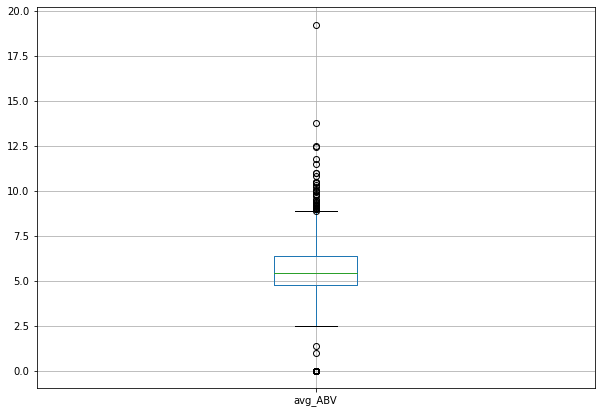

In [10]:
# creating the boxplot utilizing the average ABV by brewery
df_abv_box = df_abv.boxplot(column = 'avg_ABV', figsize = (10, 7))

### Boxplot Takeaways

+ Brewery ID '6513' is on a league of its own with an average of 19.2%
+ The median Alcohol by Volume is around 5.5 to 6%
+ There is a small amount of breweries that have a low Alcohol by Volume average, and some that are 0 because the average was null


### Question 2: Which year did beers enjoy the highest ratings?

#### Approach

+ Utilize the .to_datetime() function to extract the year from the ['review_time'] column
+ The timestamp is in [UNIX format](https://kb.narrative.io/what-is-unix-time.html) - Which is a time system for representing a point in time
+ It is the number of seconds that have elapsed since January 1st,1970 00:00:00 UTC
+ This means that when we convert the data using the to_datetime() function, the unit must be seconds instead of nanoseconds
+ Once we have the year, the data can be aggregated by year and calculate the average for highest ratings

In [11]:
# adding a new column to the dataframe with the year the review was placed
df['review_year'] = pd.to_datetime(df['review_time'], unit = "s").dt.year

ValueError: unit='s' not valid with non-numerical val='2009-02-16'

In [ ]:
# getting a better understanding of the distribution of reviews by year
review_counts = df.groupby('review_year')['review_time'].count().reset_index().rename({"review_time" : "review_counts"}, axis = 1)

In [ ]:
# aggregating ratings grouped by year and the average review rating
df_review_year = df.groupby('review_year')['review_overall'].mean().reset_index().rename({"review_overall" : "avg_review_rating"}, axis = 1)

# rounding the review rating to the second nearest decimal
df_review_year['avg_review_rating'] = round(df_review_year['avg_review_rating'], 2)

# displaying the graph
df_review_year

In [ ]:
# merging the counts and the average for better visualization
df_review_year = pd.merge(df_review_year, review_counts, how = 'left', on = 'review_year')

# displaying the table after the join, now has the total reviews and the average
df_review_year

### Key takeaways from the data above

+ Despite having the highest average, year 2000 only received 33 reviews in total
+ To add additional context, 2011 received over 100,000 reviews alone
+ 1998 and 1999 also had very low review numbers, but at the years progress, the counts increase drastically
+ Years 1998 to 2001 average the highest ratings, however, based on the distribution of reviews it could be labelled at not enough data to draw conclusions

### Next Steps

+ Create a visualization that demonstrates average rating per year, while also including the total amount of reviews

In [ ]:
# setting plot style to dark grid
sns.set_style('darkgrid')

# defining font sizes for the plot elements
fontsize = 20
axfont = 12

# creating a new figure with a size of 14 x 8 
fig, ax = plt.subplots(figsize = (14, 8))

# setting up second y axis to plot review counts
ax2 = ax.twinx()

# plotting the first axis, which is the average review ratings and setting the bar colour to blue
df_review_year.plot(x = 'review_year', y = 'avg_review_rating', kind = 'bar', color = 'blue', ax = ax, position = 0, width = 0.25)

# plotting the secondary axis, which is the review counts and setting the bar colour to red
df_review_year.plot(x = 'review_year', y = 'review_counts', kind = 'bar', color = 'red', ax = ax2, position = 1, width = 0.25)

# adding a title to the barchart, and increasing the title to font 20
plt.title('Average review rating by year vs. Total reviews received', fontdict = {'fontsize' : fontsize})
                    
# displaying the visual    
plt.show();

### Question 3: Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

#### Approach

+ In order to determine the importance between the factors listed and the users' overall rating, we need to calculator correlations between them
+ We can do so by grouping by beer_id, and calculate the mean of taste, aroma, appearance, palette and overall review
+ After that information is created, we can use the .corr() function to see what factors have greater importance

In [ ]:
# creating a dataframe grouprd by beer_id and getting the average for taste, aroma, appearance, palette and overall rating to emable correlation
df_corr = df.groupby('beer_beerId')[['review_taste', 'review_aroma', 'review_appearance', 'review_palette', 'review_overall']].mean()

# rounding the columns to the second nearest decimal
df_corr[['review_taste', 'review_aroma', 'review_appearance', 'review_palette', 'review_overall']] = round(df_corr[['review_taste', 'review_aroma', 'review_appearance', 'review_palette', 'review_overall']], 2)

# displaying the dataframe
df_corr

### Correlations between factors

+ In order to perform and understand correlation between factors, we can use the .corr() function

### What is the .corr() function and what does it do?

+ At it's core, the [.corr()](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/) is used to find the pairwise correlation of all columns in the Pandas Dataframe
+ NaN or Null Values are excluded
+ Using seaborn, creat a heatmap visual to get an illustration of correlations by factor and their importance

In [ ]:
# using the .corr() function on the df_corr dataframe
round(df_corr.corr(), 2)

In [ ]:
# importing heatmop from the seaborn library
from seaborn import heatmap

# creating a new figure with a size of 16 x 10
fig, ax = plt.subplots(figsize = (16, 10))

# displaying the heatmap visual and setting the annot to True so it displays the numbers
heat_map = heatmap(data = df_corr.corr(), annot = True, ax = ax)

### What does the heatmap tell us?

+ Aroma is the most important factor when it comes to overall review rating
+ Taste is the second most important factor

### Question 4: If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

#### Approach

+ I like to read reviews before purchasing anything, and I would do the same for my friends as well
+ So how to approach this?
+ Recommend beers that are reviewed consistently, and have a high probability of being highly rated
+ Therefore, we can aggregate the data by beer_id, calculate the average review grade, and the total number of times a beer has been reviewed
+ From there, sort the data by the average review score, but it is important to keep in mind the amount of review a beer has also received
+ For example, if the average review score is 5 but it has only received 1 review, making is subjective. Ideally, we want a higher amount of reviews

In [ ]:
# creating a new dataframe grouped by beer_id and aggregating the avg review grade and the total number of times a beer has been reviewed
recommend_df = df.groupby('beer_beerId')['review_overall'].agg(['count', 'mean']).reset_index()

# renaming the columns on the dataframe for better readability 
recommend_df = recommend_df.rename({"count" : "total_reviews", "mean" : "avg_review_score"}, axis = 1)

In [ ]:
# sorting data by average review score, with the highest scores descending
recommend_df = recommend_df.sort_values(by = 'avg_review_score', ascending = False)

# displaying the dataset
recommend_df.head(10)

### Lessons from above..

+ While these ratings may be perfect, it's important to keep in mind that they have only received one review
+ This makes the result subjective, and we would ideally want to recommend beers that have been reviewed by a larger group of people
+ We need to dive deeper into the data and investigate to find a more reasonable cut off number

### How to tackle this problem?

+ Understand the distribution of reviews by beer_id to find a reasonable cut off 
+ Using the .describe() function, we can quickly find the distribution of reviews

In [ ]:
# using the .describe() function to get a better understanding of the distribution of reviews by beer
round(recommend_df.describe(), 3)

## Takeaways from the .describe() function

+ At least 50% of the beers have 3 reviews or less, skewing the data
+ To confirm that it is skewed, plotting into a visual might be a quick and easy way to find out
+ It is also very important to understand what is a good number of reviews to filter beers reviews by. Should it be any beer with 100 reviews or over? Or should it be higher?

In [ ]:
# creating a new figure with a specific size
plt.figure(figsize = (14, 10))

# plotting a histogram for the total reviews with 50 bins
plt.hist(recommend_df['total_reviews'], bins = 50);

In [ ]:
# calculating the total amount of beers that have received over 100 reviews by consumers
over_100 = recommend_df[recommend_df['total_reviews'] > 100]['total_reviews'].count()

# calculating the percentage of rows where 'total_reviews' is greater than 100
over_100_perc = round(over_100/recommend_df['total_reviews'].count() * 100, 2)

# printing formatted statement to show the overall % of beers with over 100 reviews
print(f"The total number of beers that have over 100 reviews by consumers is {over_100_perc}% of the dataset")

In [ ]:
# creating a new figure with a specific size
plt.figure(figsize = (14, 10))

# adding a title to the histogram
plt.title('Number of Reviews distribution')

# plotting a histogram for the subset of 'total_reviews' greater than 100 with 50 bins
plt.hist(recommend_df[recommend_df['total_reviews']  > 100]['total_reviews'], bins = 50);

### Now that the data has been filtered

+ The next steps are to create a new dataframe filtering out any beer with less than 100 reviews
+ The dataframe will have beer_id, name, style, followed by review count and overall review rating
+ From there, we can calculate the average review rating by the consumer and take those beers as recommendations to my friends
+ The new dataframe will be sorted by the average review rating ascending

In [ ]:
# creating a new dataframe grouped by beer_id, beer_name, beer_style calculating the count and average of reviews
filtered_review_df = df.groupby(['beer_beerId', 'beer_name', 'beer_style'])['review_overall'].agg(['count', 'mean']).reset_index()

# renaming the columns count to total_review_count and mean to avg_consumer_rating
filtered_review_df = filtered_review_df.rename({"count" : "total_review_count", "mean" : "avg_consumer_rating"}, axis = 1)

# rounding the avg_consumer_rating to the nearest 2 decimal places
filtered_review_df['avg_consumer_rating'] = round(filtered_review_df['avg_consumer_rating'], 2)

# filtering rows where total_review count is greate or equal to 100 and sorting the dataframe by avg_consumer rating descending 
filtered_review_df = filtered_review_df[filtered_review_df['total_review_count'] >= 100].sort_values(by = 'avg_consumer_rating', ascending = False)

filtered_review_df

### Question 5: Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for that beer style?

#### Approach

+ Since this is focused on the reviews written, it involves using a Natural Language Processing (NLP) to understand the sentiment of the review
+ The sentiment can help better understand whether it is positive, neutral or negative
+ A suitable solution for this problem is Natural Language Tool Kit's VADER (Valence Aware Dictionary and sEntiment Reasoner)
+ [VADER](https://vadersentiment.readthedocs.io/en/latest/pages/introduction.html) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media
+ Create a function that reads the text and calculates the compound score and labels the sentiment Neutral, Positive, or Negative based on the compound score

#### What can VADER do?

+ The VADER model takes as input a text and outputs a dictionary of scores: pos, neg, neu, and compound
+ The first three are scoring the positive/negative/neutral sentiment in the text. They add up to one
+ The last, compound score is a combination of the first three. It ranges from -1 to 1

Let's see how VADER performs

In [ ]:
# installing libraries for vader
import nltk

# download the lexicon
nltk.download("vader_lexicon")

# importing vader library
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

# storing the sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# handling missing values in the clean column by replacing NaN with an empty string
df['review_text'] = df['review_text'].fillna('')

# converting the 'clean' column to string data type and creating a new column 'clean' in the DataFrame 'df'
df['review_text'] = pd.Series(df['review_text'], dtype = 'string')

In [ ]:
# defining a function 'get_compound' to calculate sentiment scores and classify sentiments
def get_compound(df):
    
    # extracting the 'clean' text from the DataFrame
    text = df['review_text']
    
    # calculating sentiment scores using Sideways SentimentIntensityAnalyzer (sid)
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    
     # assigning sentiment labels based on compound score
    sentiment = 'Neutral'
    if compound >= 0.3:
        sentiment = 'Positive'
    elif compound <= -0.3:
        sentiment = 'Negative'
        
    # ddding 'compound' and 'sentiment' columns to the DataFrame 'df'
    df['compound'] = compound
    df['sentiment'] = sentiment
    return df

# applying the 'get_compound' function to each row of the DataFrame 'df' using axis=1
df = df.apply(get_compound, axis = 1)

In [ ]:
# creating a new dataframe grouped by beer_style and calculatng the mean sentiment score and count of reviews for each beer style
# also renaming the columns from compound to avg_sentiment_score, and sentiment to total count of reviews
sentiment_df = df.groupby('beer_style').agg({"compound" : "mean", "sentiment" : "count"}).reset_index().rename({"compound" : "avg_sentiment_score", "sentiment" : "total_count"}, axis = 1).sort_values(by = 'avg_sentiment_score', ascending = False)

# rounding the avg_sentiment_score to the nearest 2nd decimal
sentiment_df['avg_sentiment_score'] = round(sentiment_df['avg_sentiment_score'], 2)

# displaying the dataset
sentiment_df

### Making sense of the work above

+ Quadrupel or Quad, has the highest sentiment from customer reviews with .86
+ Low Alcohol Beer had the worst sentiment score, making it the least favourite stylw

### What does this mean?

+ Quadrupel is the favourite style
+ It also received close 5K in reviews, which means customers were engaged

### Close Second

+ There were 4 beer styles tied for second
+ However, American Double / Imperial Stout in particular received over 20K reviews
+ American Double is over 4X the volume than the remaining three combined 

### Next Questions to answer

+ Is there a correlation between the review score and the sentiment of the review?
+ Is yes, is it a low positive or high positive correlation?
+ Build another heatmap visual to tell a story

In [ ]:
# displaying first ten rows of the dataframe
df.head(10)

In [ ]:
# creating a new dataframe named heatmap_df which is the data filtered by beer style Quadrupel
heatmap_df = df[df['beer_style'] == 'Quadrupel (Quad)']

# using the .corr() function to determine the correlation between the sentiment of the review
round(heatmap_df[['compound', 'review_overall']].corr(), 2)

In [ ]:
# creating a new figure with a size of 16 x 10
fig, ax = plt.subplots(figsize = (16, 10))

# using seaborn to create a heatmap visual to display correlations to the overall score
heatmap_sentiment = heatmap(data = heatmap_df[['review_overall', 'review_appearance', 'review_aroma', 'review_taste', 'review_palette', 'compound']].corr(), annot = True, ax = ax)

### Final Thoughts

+ In essence, the positive coefficient suggests that an increase in the compound score is associated with a higher overall review score
+ All aspects of the reviews show a similar level of correlation, hovering around 0.2
+ This aligns with expectations because a singular rating (the overall review score) more effectively captures users' sentiments about the beer than the written text does, especially when viewed through the lens of a computer
+ This is because the natural language processing model falls short of human-level understanding